In [1]:
import sys
sys.path.append('../../')

In [2]:
import datas.income2023f as income2023f

Loading Data
Finished Loading Data


In [3]:
income2023f.train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States,0
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland,0
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States,1


In [16]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
np.unique(income2023f.train.age)

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 87, 88, 89, 90])

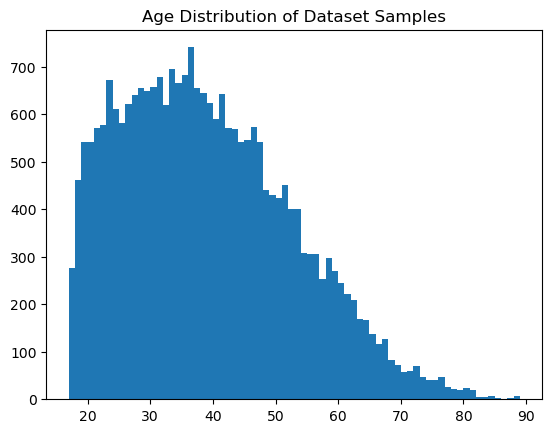

In [19]:
plt.hist(income2023f.train.age, bins=np.arange(17, 90, 1))
plt.title('Age Distribution of Dataset Samples')
None

In [74]:
def make_one_hot(x, one_hot_order):
    ret = np.zeros(shape=len(one_hot_order), dtype=np.float64)
    for i, k in enumerate(one_hot_order):
        if x==k:
            ret[i] = 1
            return ret
    raise Exception(f'Is not a known one-hot category: {x}')

In [24]:
np.unique(income2023f.train.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

In [34]:
workclass_one_hot_order = [
    '?',
    'Federal-gov',
    'Local-gov',
    'Never-worked',
    'Private',
    'Self-emp-inc',
    'Self-emp-not-inc',
    'State-gov',
    'Without-pay'
]
workclass = np.array(
    [
        make_one_hot(
            x,
            workclass_one_hot_order
        )
        for x in income2023f.train.workclass
    ]
)
workclass.shape

(25000, 9)

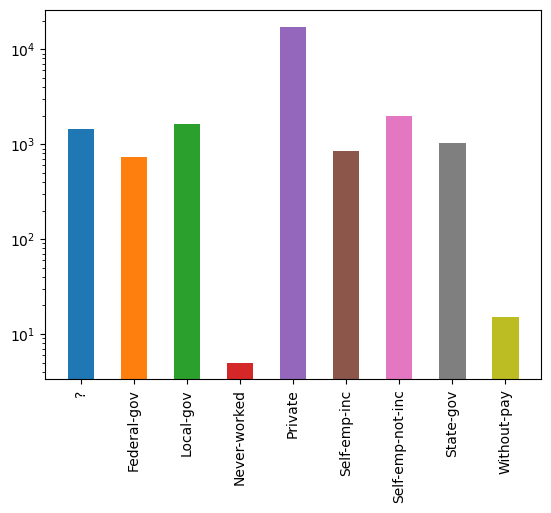

In [50]:
for i, workclass_i in enumerate(workclass.T):
    plt.bar(workclass_one_hot_order[i], sum(workclass_i), width=0.5)
plt.xticks(rotation=90)
plt.yscale('log')
None

In [56]:
np.unique(income2023f.train.fnlwgt)

array([  12285,   13769,   18827, ..., 1366120, 1484705, 1490400])

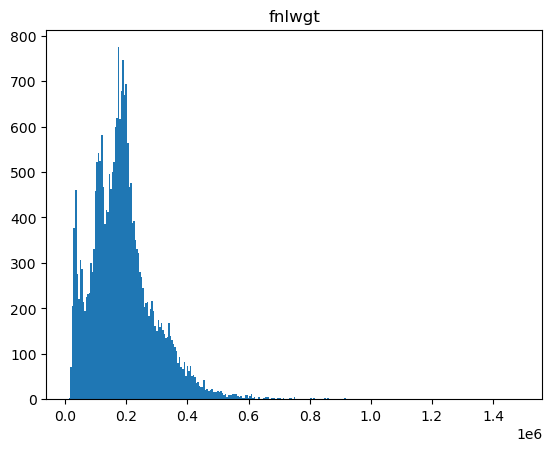

In [65]:
plt.hist(income2023f.train.fnlwgt, bins=np.arange(12285, 1490400, 5000))
plt.title('fnlwgt')
None

In [67]:
np.unique(income2023f.train.education)

array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college'],
      dtype=object)

In [76]:
education_one_hot_order = ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
       'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
       'Masters', 'Preschool', 'Prof-school', 'Some-college']
education = np.array([
    make_one_hot(x, education_one_hot_order)
    for x in income2023f.train.education
])
education.shape

(25000, 16)

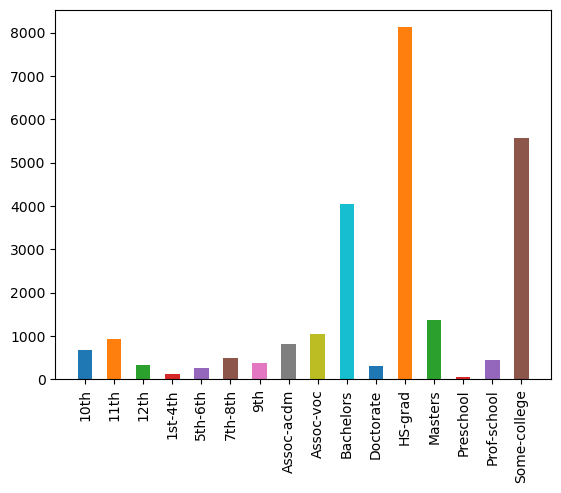

In [78]:
for i, education_i in enumerate(education.T):
    plt.bar(education_one_hot_order[i], sum(education_i), width=0.5)
plt.xticks(rotation=90)
# plt.yscale('log')
None